In [30]:
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

from lib.lib_rates import *

In [25]:
filenames = [f'out/PWR_breeder_run{i}stats.dat' for i in range(1,5)]

Pu_rate_stats_list = []

for filename in filenames:
    with open(filename, 'r') as file:
        for line in file:
            pattern = r"\b5\s+([\d.E+-]+)\s+([\d.E+-]+)"
            match = re.search(pattern, line)
            if match:
                stats = np.array([float(match.group(1)), float(match.group(2))])
                Pu_rate_stats_list.append(stats*M_PU239*YEAR/KILOGRAM) # this is the mean and std dev of the plutonium rate measurement in units of kg/year
                break # this ensures I only select the result from the first mode

Pu_rate_stats = np.array(Pu_rate_stats_list)

4.402899239744484e-150


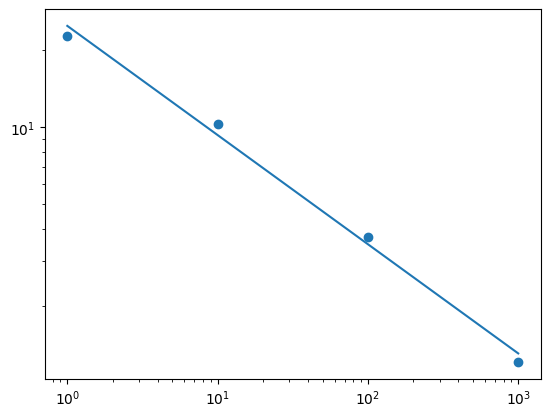

In [ ]:
fig, ax = plt.subplots()

exposures = np.array([1, 10, 100, 1000])

std_devs = Pu_rate_stats.T[1]

# This does a linear regression of the log values of the exposures and standard deviations
slope, intercept, r_value, p_value, std_err = linregress(np.log(exposures), np.log(std_devs))

min_exposure = np.exp((150 - intercept)/slope)
print(min_exposure)

std_dev_preds = np.exp ( slope * np.log(exposures) + intercept ) 

ax.scatter(exposures, std_devs)
ax.plot(exposures, std_dev_preds)

ax.set

ax.set_xscale('log')
ax.set_yscale('log')

In [39]:
slope, intercept, 1/slope, np.exp(-intercept/slope), np.exp(slope)

(np.float64(-0.42682219969020685),
 np.float64(3.2134977026548626),
 np.float64(-2.342895942914434),
 np.float64(1861.0399625617251),
 np.float64(0.6525795707633755))